# Analysis and visualization of 3D data in Python

Daniela Ushizima, Alexandre de Siqueira, Stéfan van der Walt

_BIDS @ University of California, Berkeley_

_Lawrence Berkeley National Laboratory - LBNL_

* Support material for the tutorial _Analysis and visualization of 3D data in Python_.

This tutorial will introduce how to analyze three dimensional stacked and volumetric
images in Python, mainly using scikit-image. Here we will learn how to:
  * pre-process data using filtering, binarization and segmentation techniques.
  * inspect, count and measure attributes of objects and regions of interest in the data.
  * visualize 3D data.

Please prepare for the tutorial by [installing the pre-requisite
software](preparation.md) beforehand.

For more info:
  * [[ISVC 2019]](https://www.isvc.net/)
  * [[scikit-image]](https://scikit-image.org/)


## What is scikit-image?

scikit-image is a collection of image processing algorithms which aims to integrate well with for the SciPy ecosystem.

It is well documented, and provides well-tested code to quickly build sophisticated image processing pipelines.

## Preparing for the tutorial

To participate, you'll need to git clone (or download the .zip from GitHub):

https://github.com/imagexd/2019-tutorial-skimage

You can do that in git using:

In [1]:
!git clone https://github.com/imagexd/2019-tutorial-skimage

Cloning into '2019-tutorial-skimage'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 133 (delta 63), reused 97 (delta 31), pack-reused 0
Receiving objects: 100% (133/133), 19.13 MiB | 402.00 KiB/s, done.
Resolving deltas: 100% (63/63), done.


If you have already cloned the material, please issue `git pull` now and reload the notebook to ensure that you have the latest updates.

In [2]:
%matplotlib inline

- https://scikit-image.org
- Take a look at the gallery, API docs
- The underlying stack: NumPy, SciPy (especially `scipy.ndimage`), Cython

But, before we can start using `scikit-image`, we need to understand how images are represented. For this, we will use NumPy.

## NumPy at a glance

[TODO] What is NumPy?

Throughout several examples, we will check some NumPy capabilities. We start importing the package:

In [3]:
import numpy as np

<div class="alert alert-info">

__Example 1:__ What version of NumPy do you have installed?

In [4]:
np.__version__

'1.16.4'

<div class="alert alert-info">

__Example 2:__ How to build an array of zeros, containing 300 rows and 500 columns?  

In [5]:
arr_zeros = np.zeros((300, 500))

<div class="alert alert-info">

__Example 3:__ How to generate an array with integer numbers, from 0 to 9?

In [6]:
arr_integers = np.arange(10)
print(arr_integers)

[0 1 2 3 4 5 6 7 8 9]


<div class="alert alert-info">

__Example 4:__ How do we obtain the square of this array?

In [7]:
arr_square = arr_integers ** 2
print(arr_square)

[ 0  1  4  9 16 25 36 49 64 81]


<div class="alert alert-info">

__Example 5:__ What is the data within this array? What about the array `[0.5, 1, 1.5]`?

In [8]:
print(arr_square.dtype)
arr_halves = np.array([0.5, 1, 1.5])
print(arr_halves.dtype)

int64
float64


<div class="alert alert-info">

__Example 6:__ What is the shape of the following array: `[[1, 2, 3], [4, 5, 6]]`?

In [9]:
array = np.array([[1, 2, 3], [4, 5, 6]])
print(array.shape)

(2, 3)


<div class="alert alert-info">

__Example 7:__ What is the result of ``[[1, 2, 3], [4, 5, 6]]`` + ``[10, 11, 12]``?

In [10]:
array_1 = np.array([[1, 2, 3], [4, 5, 6]])
array_2 = np.array([10, 11, 12])
print(array_1 + array_2)  # broadcasting

[[11 13 15]
 [14 16 18]]


<div class="alert alert-info">

__Example 8:__ What is the result of ``np.array([1, 2, 3], dtype=np.uint8) - 2``?

In [11]:
uint_array = np.array([1, 2, 3], dtype=np.uint8)
print(uint_array - 2)  # 'u' stands for unsigned

[255   0   1]


<div class="alert alert-info">

__Example 9:__ What is the result of ``x = np.ones((5, 1)); x @ x.T``?

In [12]:
x = np.ones((5, 1))
print(x @ x.T)  # @ denotes matrix multiplication

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


<div class="alert alert-info">

__Example 10:__ What is the result of ``x = np.array([1, 2, 3]); x[x < 3]``?

In [13]:
x = np.array([1, 2, 3, 4, 5])
print(x[x < 3])

[1 2]


# In scikit-image, images are NumPy arrays

Images are represented in ``scikit-image`` using standard NumPy arrays. These arrays are easily shared with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array. First, we import `numpy` and `matplotlib.pyplot`:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Now we use `random.random` to generate a random image with 500 rows and 500 columns. This function returns numbers in the interval `[0.0, 1.0)`:

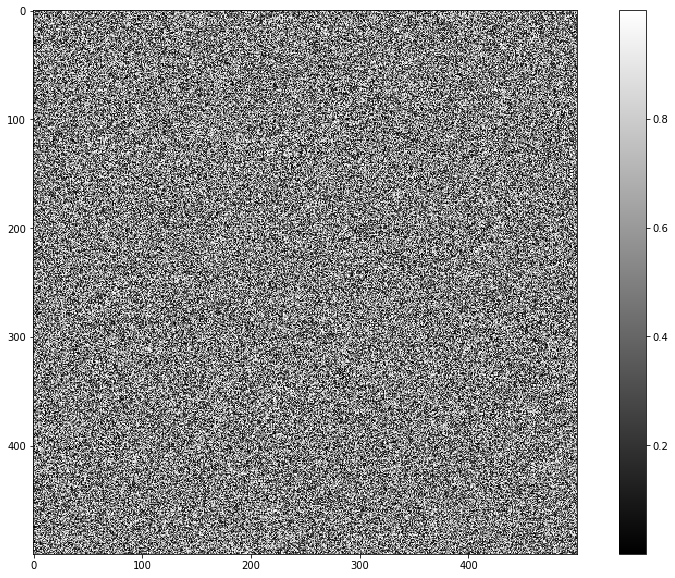

In [15]:
random_image = np.random.random([500, 500])

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images, which are also treated as NumPy arrays:

* "coins" type: <class 'numpy.ndarray'>
* "coins" data type: uint8
* "coins" shape: (303, 384)


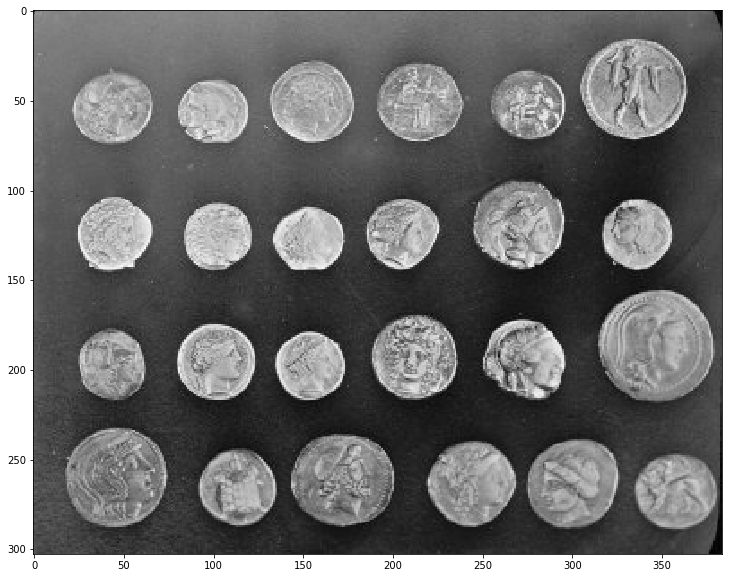

In [16]:
from skimage import data

coins = data.coins()

print(f'* "coins" type: {type(coins)}')
print(f'* "coins" data type: {coins.dtype}')
print(f'* "coins" shape: {coins.shape}')

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

* "chelsea" shape: (300, 451, 3)
* "chelsea" min/max values: (0, 231)


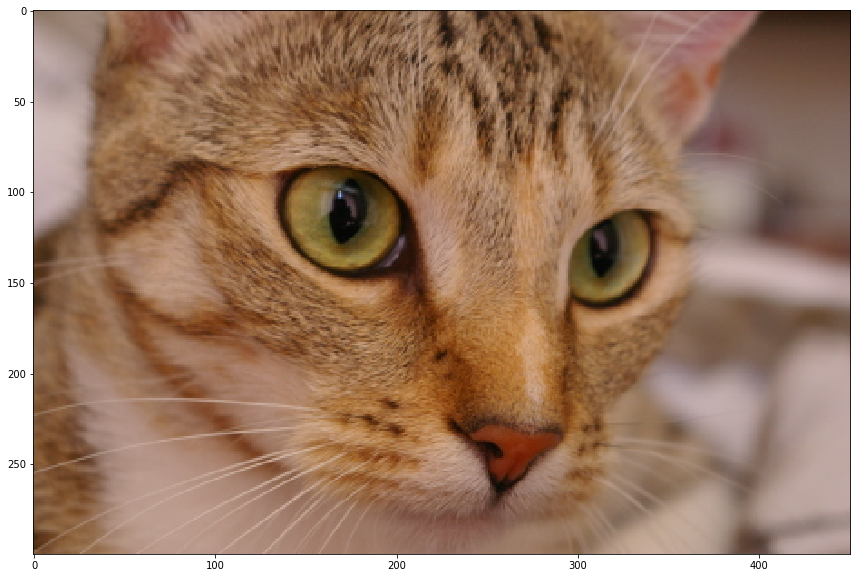

In [17]:
chelsea = data.chelsea()

print(f'* "chelsea" shape: {chelsea.shape}')
print(f'* "chelsea" min/max values: {chelsea.min(), chelsea.max()}')

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(chelsea);

Since these are just NumPy arrays, we can manipulate them directly. As an example, lets make a red square by using standard array slicing and manipulation:

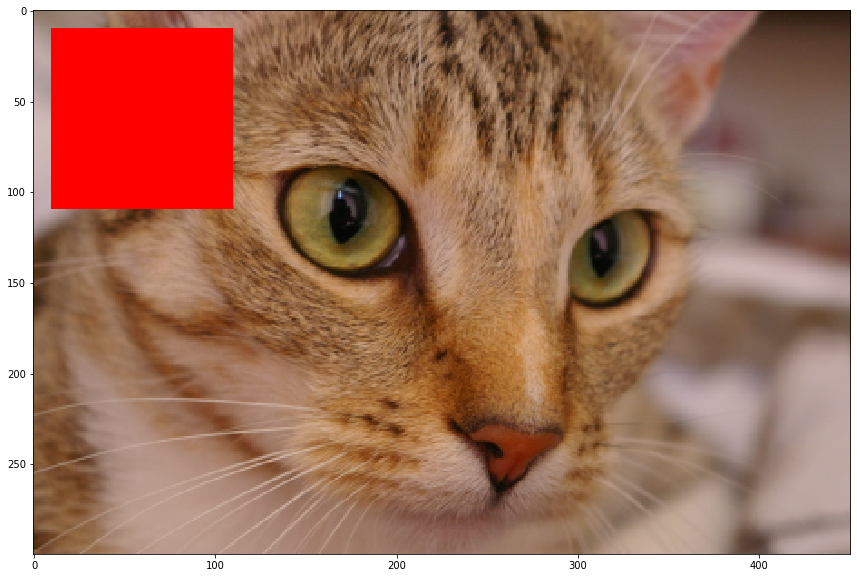

In [18]:
chelsea[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]

# generating the figure.
plt.figure(figsize=(15, 10))
plt.imshow(chelsea);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [19]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

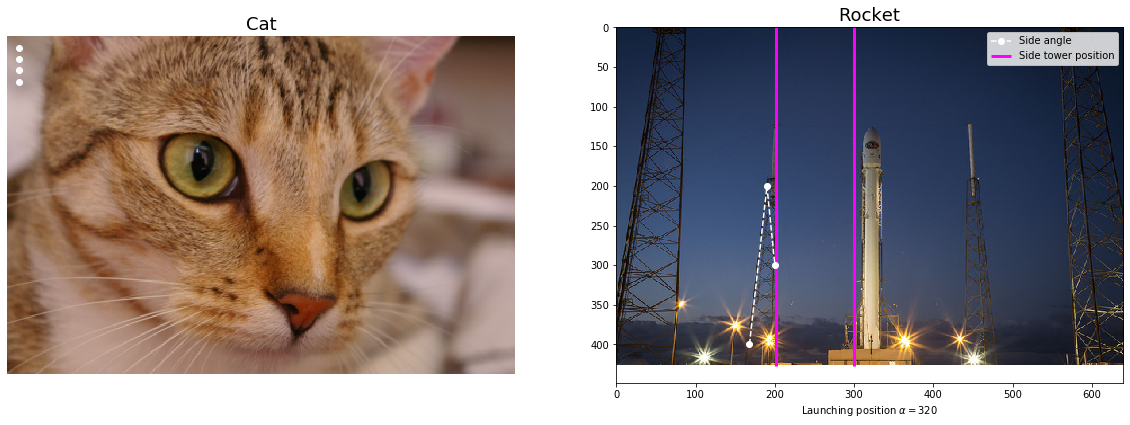

In [20]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.scatter([10, 10, 10, 10], [10, 20, 30, 40], color='white')
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta',
           linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white',
         linestyle='--', marker='o', label='Side angle')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


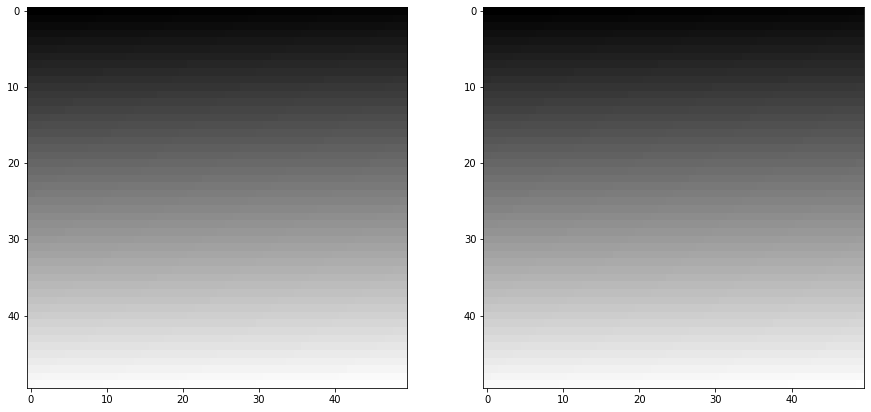

In [21]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [22]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

In [23]:
from skimage import io

image = io.imread('data/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

FileNotFoundError: [Errno 2] No such file or directory: 'data/balloon.jpg'

We also have the ability to load multiple images, or multi-layer TIFF images:

In [ ]:
from skimage import data_dir

!ls $data_dir

In [ ]:
ic = io.ImageCollection(data_dir + '/*.png')

print('Type:', type(ic))

ic.files

In [ ]:
import os

f, axes = plt.subplots(nrows=5, ncols=len(ic) // 5 + 1, figsize=(15, 10))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [ ]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    ...
    
    return out

Test your function like so:

In [ ]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

In [ ]:
# --- read in the image ---

image = plt.imread('data/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = ...
g = ...
b = ...

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

In [ ]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
red[r, c] = 1

r, c = draw.circle(100, 200, 100)
green[r, c] = 1

r, c = draw.circle(200, 150, 100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

In [ ]:
# Hint: np.stack([...], axis=2)

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

In [ ]:
from skimage import color, img_as_float

image = img_as_float(io.imread('data/balloon.jpg'))

gray = color.rgb2gray(image)
my_gray = ...

# --- display the results ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')